<a href="https://colab.research.google.com/github/Victorvv1/Curso-de-Analisis-de-Datos-/blob/main/Operaciones_en_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operaciones en Pandas

Una de las fortalezas de NumPy es que nos permite realizar operaciones rápidas elemento por elemento, tanto con aritmética básica (suma, resta, multiplicación, etc.) como con operaciones más complicadas (funciones trigonométricas, funciones exponenciales y logarítmicas, etc.). Pandas hereda gran parte de esta funcionalidad de NumPy, y las ufuncs introducidas en Cálculos en Arrays de NumPy: Funciones Universales son clave para esto.

Sin embargo, Pandas incluye un par de giros útiles: para operaciones unarias como la negación y funciones trigonométricas, estas ufuncs *preservarán las etiquetas de índice y columna* en la salida, y para operaciones binarias como la suma y la multiplicación, Pandas automáticamente *alineará los índices* al pasar los objetos a la ufunc. Esto significa que mantener el contexto de los datos y combinar datos de diferentes fuentes —ambas tareas potencialmente propensas a errores con arrays puros de NumPy— se vuelven esencialmente a prueba de fallos con Pandas. Adicionalmente, veremos que hay operaciones bien definidas entre estructuras unidimensionales `Series` y estructuras bidimensionales `DataFrame`.

## Funciones Universales: Preservación de Índices

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
rng = np.random.default_rng(42)
ser = pd.Series(rng.integers(0, 10, 4))
ser


,0
0,0
1,7
2,6
3,4


In [ ]:
df = pd.DataFrame(rng.integers(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,4,8,0,6
1,2,0,5,9
2,7,7,7,7


In [ ]:
np.exp(ser)

,0
0,1.000000
1,1096.633158
2,403.428793
3,54.598150


In [ ]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,1.224647e-16,-2.449294e-16,0.000000,-1.000000
1,1.000000e+00,0.000000e+00,-0.707107,0.707107
2,-7.071068e-01,-7.071068e-01,-0.707107,-0.707107


## Funciones Universales: Alineación de Índices

In [ ]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 39538223, 'Texas': 29145505,
                        'Florida': 21538187}, name='population')

In [ ]:
population / area

,0
Alaska,NaN
California,93.257784
Florida,NaN
Texas,41.896072


In [ ]:
area.index.union(population.index)

Index(['Alaska', 'California', 'Florida', 'Texas'], dtype='object')

In [ ]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

,0
0,NaN
1,5.0
2,9.0
3,NaN


In [ ]:
A.add(B, fill_value=0)

,0
0,2.0
1,5.0
2,9.0
3,5.0


In [ ]:
A = pd.DataFrame(rng.integers(0, 20, (2, 2)),
                 columns=['a', 'b'])
A

,a,b
0,19,8
1,6,18


In [ ]:
B = pd.DataFrame(rng.integers(0, 10, (3, 3)),
                 columns=['b', 'a', 'c'])
B

,b,a,c
0,7,1,3
1,4,4,0
2,5,1,7


In [ ]:
A + B

,a,b,c
0,20.0,15.0,NaN
1,10.0,22.0,NaN
2,NaN,NaN,NaN


In [ ]:
A.add(B, fill_value=A.values.mean())

,a,b,c
0,20.00,15.00,15.75
1,10.00,22.00,12.75
2,13.75,17.75,19.75


| Python operator | Pandas method(s)                |
|-----------------|---------------------------------|
| `+`             | `add`                           |
| `-`             | `sub`, `subtract`               |
| `*`             | `mul`, `multiply`               |
| `/`             | `truediv`, `div`, `divide`      |
| `//`            | `floordiv`                      |
| `%`             | `mod`                           |
| `**`            | `pow`                           |


## Funciones Universales: Operaciones entre DataFrames y Series

In [ ]:
A = rng.integers(10, size=(3, 4))
A

array([[3, 0, 4, 7],
       [1, 4, 1, 6],
       [4, 3, 2, 5]])

In [ ]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-2,  4, -3, -1],
       [ 1,  3, -2, -2]])

In [ ]:
df = pd.DataFrame(A, columns=['Q', 'R', 'S', 'T'])
df

,Q,R,S,T
0,3,0,4,7
1,1,4,1,6
2,4,3,2,5


In [ ]:
df.iloc[0]

,0
Q,3
R,0
S,4
T,7


In [ ]:
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-2,4,-3,-1
2,1,3,-2,-2


In [ ]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,3,0,4,7
1,-3,0,-3,2
2,1,0,-1,2


In [ ]:
df

,Q,R,S,T
0,3,0,4,7
1,1,4,1,6
2,4,3,2,5


In [ ]:
halfrow = df.iloc[0, ::2] # Seleccionamos solo las columnas Q y S de la fila 0
halfrow

,0
Q,3
S,4


In [ ]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-2.0,NaN,-3.0,NaN
2,1.0,NaN,-2.0,NaN


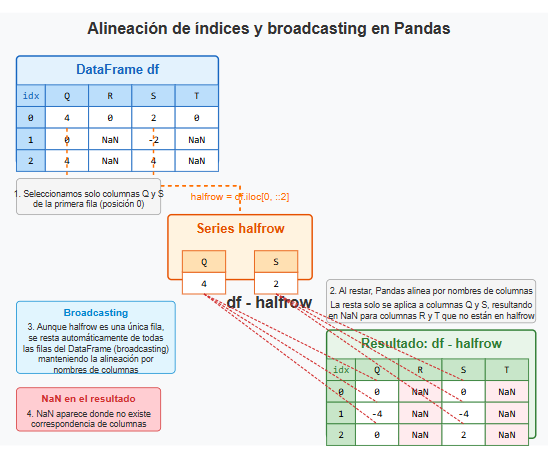

In [ ]:
# Preservación de índices en operaciones unarias

# 1.1 Crea una Serie con valores [10, 20, 30, 40] y los índices ['a', 'b', 'c', 'd']
# Tu código aquí

# 1.2 Aplica la función np.sqrt() a tu Serie y observa cómo se preservan los índices
# Tu código aquí

# 1.3 Crea un DataFrame con el siguiente contenido:
#     - Columnas: 'temp', 'precipitacion', 'humedad'
#     - Índices: 'ene', 'feb', 'mar', 'abr'
#     - Valores aleatorios entre 0 y 100
# Puedes usar np.random.default_rng(42).integers(0, 100, (4, 3))
# Tu código aquí

# 1.4 Aplica las siguientes operaciones al DataFrame y observa cómo se preservan índices y columnas:
#     a) Multiplica todos los valores por 0.5
#     b) Aplica np.sin() a todos los valores
# Tu código aquí

# Alineación de índices en Series

# 2.1 Crea dos Series:
# - serie_ventas: con ventas por tienda (índices 'Tienda A', 'Tienda B', 'Tienda C')
# - serie_costos: con costos por tienda (índices 'Tienda A', 'Tienda C', 'Tienda D')
serie_ventas = pd.Series([1000, 1200, 800], index=['Tienda A', 'Tienda B', 'Tienda C'])
serie_costos = pd.Series([700, 550, 900], index=['Tienda A', 'Tienda C', 'Tienda D'])

# 2.2 Calcula el beneficio (ventas - costos) y observa qué sucede con los índices
# ¿Qué índices aparecen en el resultado? ¿Qué valores son NaN?
# Tu código aquí

# 2.3 Repite el cálculo anterior pero esta vez usa el método .sub() con fill_value=0
# para tratar los valores faltantes como 0.
# Tu código aquí

# 2.4 Calcula la proporción ventas/costos. Para evitar divisiones por cero,
# usa el método .div() con fill_value=1
# Tu código aquí

# Alineación en DataFrames

# 3.1 Crea dos DataFrames:
# - df1: con columnas 'A', 'B', 'C' e índices 1, 2, 3
# - df2: con columnas 'B', 'C', 'D' e índices 2, 3, 4
# Usa valores aleatorios entre 1 y 10
# Tu código aquí

# 3.2 Suma los dos DataFrames y observa el resultado
# ¿Qué columnas e índices aparecen en el resultado? ¿Qué valores son NaN?
# Tu código aquí

# 3.3 Repite la suma usando el método .add() con fill_value=0
# Tu código aquí

# 3.4 Calcula df1 / df2 usando el método .div() con un fill_value
# apropiado para evitar divisiones por cero
# Tu código aquí

# Operaciones entre DataFrames y Series

# 4.1 Crea un DataFrame con datos de temperaturas:
# - Columnas: 'ene', 'feb', 'mar', 'abr'
# - Índices: 'ciudad1', 'ciudad2', 'ciudad3'
# Tu código aquí

# 4.2 Extrae la primera fila del DataFrame como una Serie
# Tu código aquí

# 4.3 Resta esta Serie de todo el DataFrame para calcular
# las diferencias respecto a la primera ciudad
# Tu código aquí

# 4.4 Extrae la columna 'feb' como una Serie
# Tu código aquí

# 4.5 Resta esta Serie de todo el DataFrame usando el método .sub()
# con axis=0 para operar por columnas
# Tu código aquí

# 4.6 Crea una Serie con valores [10, 20] e índices ['ene', 'mar']
# Réstala del DataFrame y observa la alineación de índices
# Tu código aquí

In [ ]:
import pandas as pd
import numpy as np

# 1.1 Crea una Serie con valores [10, 20, 30, 40] y los índices ['a', 'b', 'c', 'd']
serie = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
print("Serie original:")
print(serie)

# 1.2 Aplica la función np.sqrt() a tu Serie y observa cómo se preservan los índices
raiz_cuadrada = np.sqrt(serie)
print("\nRaíz cuadrada (preservando índices):")
print(raiz_cuadrada)

# 1.3 Crea un DataFrame con el siguiente contenido:
rng = np.random.default_rng(42)
df = pd.DataFrame(
    rng.integers(0, 100, (4, 3)),
    index=['ene', 'feb', 'mar', 'abr'],
    columns=['temp', 'precipitacion', 'humedad']
)
print("\nDataFrame original:")
print(df)

# 1.4 Aplica las siguientes operaciones al DataFrame
# a) Multiplica todos los valores por 0.5
df_mitad = df * 0.5
print("\nDataFrame multiplicado por 0.5:")
print(df_mitad)

# b) Aplica np.sin() a todos los valores
df_seno = np.sin(df)
print("\nSeno de los valores (preservando índices y columnas):")
print(df_seno)

# c) Redondea todos los valores a enteros
df_redondeado = np.rint(df_mitad)
print("\nValores redondeados:")
print(df_redondeado)

In [ ]:
# 2.1 Crea dos Series
serie_ventas = pd.Series([1000, 1200, 800], index=['Tienda A', 'Tienda B', 'Tienda C'])
serie_costos = pd.Series([700, 550, 900], index=['Tienda A', 'Tienda C', 'Tienda D'])

print("Ventas por tienda:")
print(serie_ventas)
print("\nCostos por tienda:")
print(serie_costos)

# 2.2 Calcula el beneficio (ventas - costos)
beneficio = serie_ventas - serie_costos
print("\nBeneficio (con alineación automática):")
print(beneficio)
print("\nNota: Tienda D tiene NaN porque no hay ventas, y Tienda B tiene NaN porque no hay costos")

# 2.3 Usa .sub() con fill_value=0
beneficio_con_ceros = serie_ventas.sub(serie_costos, fill_value=0)
print("\nBeneficio (tratando faltantes como 0):")
print(beneficio_con_ceros)

# 2.4 Calcula la proporción ventas/costos con .div()
proporcion = serie_ventas.div(serie_costos, fill_value=1)
print("\nProporción ventas/costos (tratando faltantes como 1):")
print(proporcion)

Ventas por tienda:
Tienda A    1000
Tienda B    1200
Tienda C     800
dtype: int64

Costos por tienda:
Tienda A    700
Tienda C    550
Tienda D    900
dtype: int64

Beneficio (con alineación automática):
Tienda A    300.0
Tienda B      NaN
Tienda C    250.0
Tienda D      NaN
dtype: float64

Nota: Tienda D tiene NaN porque no hay ventas, y Tienda B tiene NaN porque no hay costos

Beneficio (tratando faltantes como 0):
Tienda A     300.0
Tienda B    1200.0
Tienda C     250.0
Tienda D    -900.0
dtype: float64

Proporción ventas/costos (tratando faltantes como 1):
Tienda A       1.428571
Tienda B    1200.000000
Tienda C       1.454545
Tienda D       0.001111
dtype: float64


In [ ]:
# 3.1 Crea dos DataFrames
df1 = pd.DataFrame(
    rng.integers(1, 10, (3, 3)),
    index=[1, 2, 3],
    columns=['A', 'B', 'C']
)
df2 = pd.DataFrame(
    rng.integers(1, 10, (3, 3)),
    index=[2, 3, 4],
    columns=['B', 'C', 'D']
)

print("DataFrame 1:")
print(df1)
print("\nDataFrame 2:")
print(df2)

# 3.2 Suma los dos DataFrames
suma = df1 + df2
print("\nSuma de DataFrames (con alineación automática):")
print(suma)
print("\nSe muestran NaN donde no hay correspondencia entre columnas e índices")

# 3.3 Suma con .add() y fill_value=0
suma_con_ceros = df1.add(df2, fill_value=0)
print("\nSuma de DataFrames (tratando faltantes como 0):")
print(suma_con_ceros)

# 3.4 División con .div() para evitar divisiones por cero
division = df1.div(df2, fill_value=1)
print("\nDivisión de DataFrames (tratando faltantes como 1):")
print(division)

DataFrame 1:
   A  B  C
1  7  9  4
2  2  8  6
3  7  1  3

DataFrame 2:
   B  C  D
2  7  8  4
3  8  8  4
4  9  3  3

Suma de DataFrames (con alineación automática):
    A     B     C   D
1 NaN   NaN   NaN NaN
2 NaN  15.0  14.0 NaN
3 NaN   9.0  11.0 NaN
4 NaN   NaN   NaN NaN

Se muestran NaN donde no hay correspondencia entre columnas e índices

Suma de DataFrames (tratando faltantes como 0):
     A     B     C    D
1  7.0   9.0   4.0  NaN
2  2.0  15.0  14.0  4.0
3  7.0   9.0  11.0  4.0
4  NaN   9.0   3.0  3.0

División de DataFrames (tratando faltantes como 1):
     A         B         C         D
1  7.0  9.000000  4.000000       NaN
2  2.0  1.142857  0.750000  0.250000
3  7.0  0.125000  0.375000  0.250000
4  NaN  0.111111  0.333333  0.333333


In [ ]:
# 4.1 Crea un DataFrame con datos de temperaturas
temperaturas = pd.DataFrame(
    rng.integers(10, 30, (3, 4)),
    index=['ciudad1', 'ciudad2', 'ciudad3'],
    columns=['ene', 'feb', 'mar', 'abr']
)
print("Temperaturas por ciudad y mes:")
print(temperaturas)

# 4.2 Extrae la primera fila como una Serie
temp_ciudad1 = temperaturas.iloc[0]
print("\nTemperaturas de ciudad1:")
print(temp_ciudad1)

# 4.3 Resta esta Serie de todo el DataFrame
diferencias = temperaturas - temp_ciudad1
print("\nDiferencias respecto a ciudad1:")
print(diferencias)

# 4.4 Extrae la columna 'feb' como una Serie
temp_febrero = temperaturas['feb']
print("\nTemperaturas de febrero:")
print(temp_febrero)

# 4.5 Resta esta Serie de todo el DataFrame por columnas
diferencias_febrero = temperaturas.sub(temp_febrero, axis=0)
print("\nDiferencias respecto a febrero:")
print(diferencias_febrero)

# 4.6 Crea una Serie con índices parciales
serie_parcial = pd.Series([10, 20], index=['ene', 'mar'])
print("\nSerie parcial:")
print(serie_parcial)

# Réstala del DataFrame
resultado_parcial = temperaturas - serie_parcial
print("\nDataFrame - serie_parcial (con alineación de índices):")
print(resultado_parcial)

Temperaturas por ciudad y mes:
         ene  feb  mar  abr
ciudad1   23   22   12   26
ciudad2   13   26   10   25
ciudad3   25   25   23   19

Temperaturas de ciudad1:
ene    23
feb    22
mar    12
abr    26
Name: ciudad1, dtype: int64

Diferencias respecto a ciudad1:
         ene  feb  mar  abr
ciudad1    0    0    0    0
ciudad2  -10    4   -2   -1
ciudad3    2    3   11   -7

Temperaturas de febrero:
ciudad1    22
ciudad2    26
ciudad3    25
Name: feb, dtype: int64

Diferencias respecto a febrero:
         ene  feb  mar  abr
ciudad1    1    0  -10    4
ciudad2  -13    0  -16   -1
ciudad3    0    0   -2   -6

Serie parcial:
ene    10
mar    20
dtype: int64

DataFrame - serie_parcial (con alineación de índices):
         abr   ene  feb   mar
ciudad1  NaN  13.0  NaN  -8.0
ciudad2  NaN   3.0  NaN -10.0
ciudad3  NaN  15.0  NaN   3.0
